In [1]:
import sys, os, os.path
if not 'EXPERIMENT_HOME' in os.environ: # Configure local paths if not already defined
    ML_HOME = os.path.abspath(os.path.join("..", "ml_home")) # ML workspace
    EXPERIMENT_HOME = os.path.abspath(os.path.join(ML_HOME, "..")) # Experiment workspace
    DATA_HOME = os.path.abspath(os.path.join(EXPERIMENT_HOME,"dataset")) # Dataset location
    os.environ["EXPERIMENT_HOME"] = EXPERIMENT_HOME
    os.environ["DATA_HOME"] = DATA_HOME
    sys.path.insert(0, EXPERIMENT_HOME)
    sys.path.insert(0, ML_HOME) # Add to path so can load our library
    os.chdir(EXPERIMENT_HOME) # Change working directory to experiment workspace
print("Experiment Home: ", os.path.abspath(os.curdir), "; Data Home:", DATA_HOME)

Experiment Home:  /home/jovyan ; Data Home: /home/jovyan/dataset


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Test

# from data.pilot import build_pilot_dataset
# df_stocks, df_indices = build_pilot_dataset()

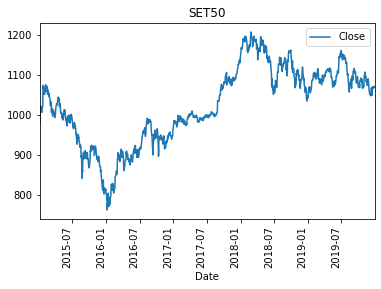

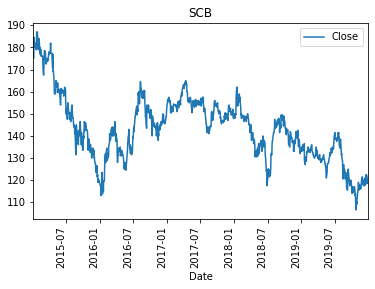

In [8]:
# Usage:
from data.pilot import load_pilot_series

dataset = load_pilot_series()

dataset.keys()

dataset['SET50'][['Close']].plot(title='SET50', rot=90)
dataset['SCB'][['Close']].plot(title='SCB', rot=90)


In [ ]:
# Extract period from historical/
from dataset import Yr2014, Yr2020, Yr2019
from data.src import stockdata_fetch_local

In [ ]:

from data.src import stockdata_fetch_local


In [ ]:
tbl = df_stocks.pivot_table(values='Close', index='Date', columns=['Industry', 'Sector', 'Ticker'])
tbl

In [ ]:
tbl.plot(figsize=(18,8))
plt.ylabel('Close Price (THB)')

In [ ]:
from data.src import indexdata_fetch_local, read_csv_from_historical_folder

In [ ]:
indices = ["SET","SET50","SET100"]
df_indices = indexdata_fetch_local(Yr2014.dt_end, Yr2019.dt_end, ["SET","SET50","SET100"])
df_indices

In [ ]:
df_indices[df_indices['Ticker']=='SET50']

In [ ]:
# indices['SET50'] = df_indices[df_indices['Ticker']=='SET50']
# indices['SET100'] = df_indices[df_indices['Ticker']=='SET100']
#  indices['SET'].index = pd.to_datetime(indices['SET']['Date'])
# indices['SET']

In [ ]:
symbols = indices
df = pd.DataFrame()
indices = {}
for i in symbols:
    indices[i] = df_indices[df_indices['Ticker']==i]
    indices[i].index = pd.to_datetime(indices[i]['Date'])
    df = pd.concat([df, indices[i]])

# indices

In [ ]:
""" From 10-stock_QP.ipynb
df = pd.DataFrame()
dataset = {}
for s in stocks:
    try:
        data = pdr.get_data_yahoo('%s.BK' % s,start=start,end=end)
        data['ticker'] = s # add ticker to column
        data['adj_close'] = data['Adj Close']
        dataset[s] = data[['ticker', 'adj_close']] # Need two columns
        df = pd.concat([df, dataset[s]])
    except Exception as e:
        print("Error: %s %s" % (s, str(e)))
"""

table = df.pivot(columns='Ticker')['Price'] # Pivot table
table

In [ ]:
fig, ax = plt.subplots()
for si in indices:
    a = indices[si][['Close']].plot(ax=ax, legend=False, figsize=(18, 8))
ax.legend(indices.keys())
plt.ylabel('Closing Value (Point)')

# Merge two Pivot tables

In [ ]:
tbl_index = df_indices.pivot_table(values='Close', index='Date', columns=['Ticker'])
tbl_index

In [ ]:
tbl_stock = df_stocks.pivot_table(values='Close', index='Date', columns=['Ticker'])
tbl_stock

# Apply frequency 'day' to both frames and see the NaN data point

In [ ]:
tbl_stock.index
tbl_stock.asfreq('d')

In [ ]:
tbl_index.asfreq('d')

# There is some missing data

The index counts for two data frames are not aligned.

In [ ]:
tbl_index.index.difference(tbl_stock.index)

### 2017-01-13

In [ ]:
tbl_stock['2017-01-12':'2017-01-14']

In [ ]:
tbl_index['2017-01-12':'2017-01-14']

### 2017-05-05

In [ ]:
tbl_stock['2017-05-04':'2017-05-06']

In [ ]:
tbl_index['2017-05-04':'2017-05-06']

In [ ]:
## 

tbl_stock.index.difference(tbl_index.index)

### 2015-05-04

In [ ]:
tbl_stock['2015-05-03':'2015-05-05']

In [ ]:
tbl_index['2015-05-03':'2015-05-05']

In [ ]:
tbl_stock.plot(figsize=(18,8))

In [ ]:
tbl_stock.columns

In [ ]:
tbl_index.columns

In [ ]:
PILOT_DATA_HOME = os.path.join(DATA_HOME, 'pilot.data')


def write_piot_series(ticker, dataframe, folder=PILOT_DATA_HOME):
    dataframe.to_csv(os.path.join(folder,'%s.csv' % ticker))
    print("Wrote: %s pilot data series with %s observations." % (ticker, len(dataframe)))
    return dataframe

# For each stock, 
# for i in symbols:
#     indices[i] = df_indices[df_indices['Ticker']==i]

os.listdir(PILOT_DATA_HOME)

tbl_stock.columns[1]

In [ ]:
for ticker in tbl_stock.columns:
    df_series = df_stocks[df_stocks['Ticker']==ticker]
    df_series.index = pd.to_datetime(df_series['Date'])
    write_piot_series(ticker, df_series)


In [ ]:
for ticker in tbl_index.columns:
    df_series = df_indices[df_indices['Ticker']==ticker]
    df_series.index = pd.to_datetime(df_series['Date'])
    write_piot_series(ticker, df_series)

In [ ]:
# Check pilot data folder
os.listdir(PILOT_DATA_HOME)

In [ ]:
PILOT_DATA_HOME = os.path.join(DATA_HOME, 'pilot.data')
os.listdir(PILOT_DATA_HOME)